<a href="https://colab.research.google.com/github/elenaaalmg/PracticasComputacionII/blob/main/ProyectoUnidadII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving TSLAm.csv to TSLAm (3).csv
Ajuste polinomial
Data has shifted downwards by 625.22


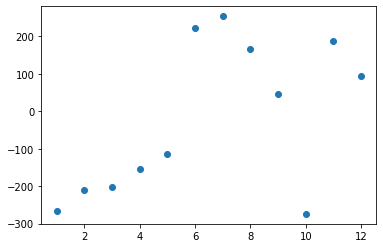

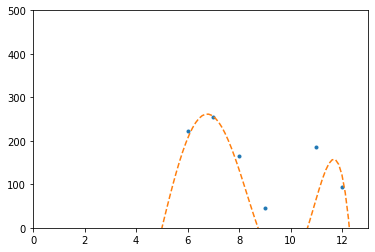

'Polinomio: '

-0.1257*x**6 + 4.991*x**5 - 75.88*x**4 + 551.2*x**3 - 1953*x**2 + 3133*x - 1942


Bissection Method
La raiz está en:  5.0029296875
Error en el tramo:  0.0009765625
La raiz está en:  8.7353515625
Error en el tramo:  0.0009765625
La raiz está en:  10.6572265625
Error en el tramo:  0.0009765625
La raiz está en:  12.2822265625
Error en el tramo:  0.0009765625

Newton Rapshon Method
Solución encotrada, hay una raíz en: 5.003667201886206
Solución encotrada, hay una raíz en: 8.73473182628242
Solución encotrada, hay una raíz en: 10.657428402720749
Solución encotrada, hay una raíz en: 12.282272686382003


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.abc import x,y
from scipy import interpolate
from numpy.core.function_base import linspace
from pandas.core.missing import interpolate_1d


class Graph():

  def PolynomialFit(self,bdnew):
    x = bdnew['X-axis']
    y = bdnew['Adj Close']

    print('Data has shifted downwards by 625.22')

    plt.plot(x, y,'o', label = 'raw data')
    plt.show()

    p6 = np.poly1d(np.polyfit(x, y, 6))
    xp = np.linspace(0, 12.5,100)
    _ = plt.plot(x, y, '.', xp, p6(xp), '--')
    plt.ylim(-1000,1000)
    plt.axis([0,13,0,500])
    plt.show()

    return p6

class BissectionMethod():

  def Bissection(self,fx,a,b,tolera):
    tramo = b-a
    while not(tramo<tolera):
        c = (a+b)/2
        fa = np.polyval(fx,a)
        fb = np.polyval(fx,b)
        fc = np.polyval(fx,c)
        signo = np.sign(fa)*np.sign(fc)
        if signo < 0: 
            a = a
            b = c
        if signo > 0:
            a = c
            b = b
        tramo = b-a

    print('La raiz está en: ', c)
    print('Error en el tramo: ', tramo)

    return c

class NewtonRaphsonMethod():

  def newtonRaphsonMultiply(self, f, df, df2, X_n, tol, maxIter):
    error = np.inf
    iter = 0
    while iter <= maxIter:
        
        if np.polyval(df,X_n) == 0:  #división por cero
            print('Se encontró una indeterminación')
            return None
        
        X_n1 = X_n - (np.polyval(f,X_n)*np.polyval(df,X_n))/((np.polyval(df,X_n)**2) - np.polyval(f,X_n)*np.polyval(df2,X_n))
        error = abs(X_n1 - X_n)

        if error < tol: #criterio de parada
            print('Solución encotrada, hay una raíz en:', X_n1)
            return X_n1
        
        X_n = X_n1
        iter += 1

        if iter == maxIter: 
          print( 'El método no convergió')
          return None

def main():
  from google.colab import files
  files.upload()

  bdnew = pd.read_csv('TSLAm.csv')

  print('Ajuste polinomial')
  objPF = Graph()
  fx = objPF.PolynomialFit(bdnew)

  dfx = fx.deriv()
  dfx2 = dfx.deriv()

  a = 4
  b = 6
  c = 8
  d = 10
  e = 10
  f = 12
  g = 12
  h = 13

  X = [5, 9, 11, 12] #arreglo de puntos iniciales

  tolera = 0.001

  func = -0.1257*x**6 + 4.991*x**5 - 75.88*x**4 + 551.2*x**3 - 1953*x**2 + 3133*x - 1942
  display("Polinomio: ", func)

  print('\nBissection Method')
  objBM = BissectionMethod()
  Bissection1 = objBM.Bissection(fx,a,b,tolera)
  Bissection2 = objBM.Bissection(fx,c,d,tolera)
  Bissection3 = objBM.Bissection(fx,e,f,tolera)
  Bissection4 = objBM.Bissection(fx,g,h,tolera)


  print('\nNewton Rapshon Method')
  ObjNRM = NewtonRaphsonMethod()
  for X_n in X:
    raiz_n = ObjNRM.newtonRaphsonMultiply(fx,dfx,dfx2,X_n,tolera,50)

if __name__ == "__main__":
    main()     